# TO DO 

verifica se diade corretta

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import sklearn

from skimage import data, color

# Visualizing dyad

## compute SVD

Image dimensions:  400 x 600


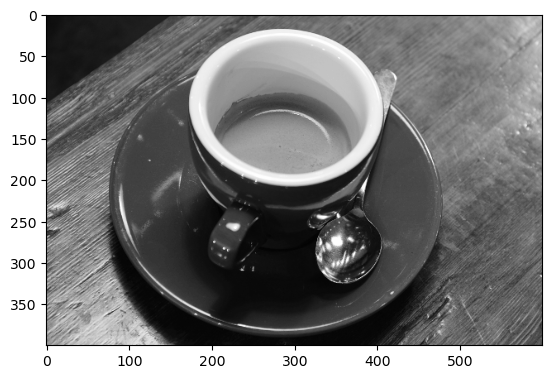

In [252]:
# Load and convert to grayscale
image = color.rgb2gray(data.coffee()) 
m, n = image.shape
print("Image dimensions: ", m,"x" ,n)
plt.imshow(image, cmap='gray')
plt.show()


In [253]:

U, S, Vt = np.linalg.svd(image, full_matrices=True) # if full_matrices=True, then U and Vt are not truncated

print(U.shape, S.shape, Vt.shape)

print("Rank of the matrix image = ",S.size)

(400, 400) (400,) (600, 600)
Rank of the matrix image =  400


## Visualize Dyads

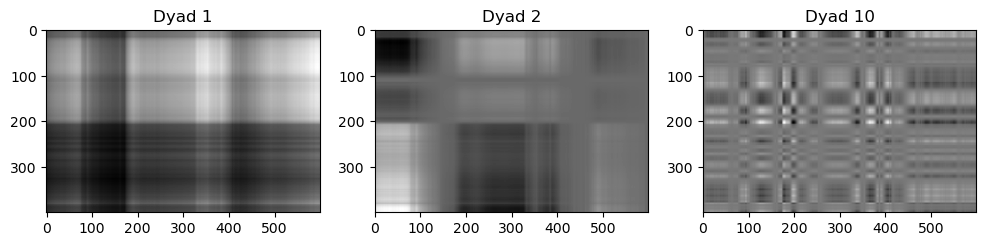

In [254]:
k_values = [1, 2, 10]
plt.figure(figsize=(12, 6))
for i, k in enumerate(k_values):
    dyad = np.outer(U[:, k - 1], Vt[k - 1, :])#-------ricorda che prendi dalla riga di Vt perche vuoi la colonna di V non trasposta
    plt.subplot(1, len(k_values), i + 1)
    plt.imshow(dyad, cmap="gray")
    plt.title(f"Dyad {k}")
plt.show()

## Plot Singular Values

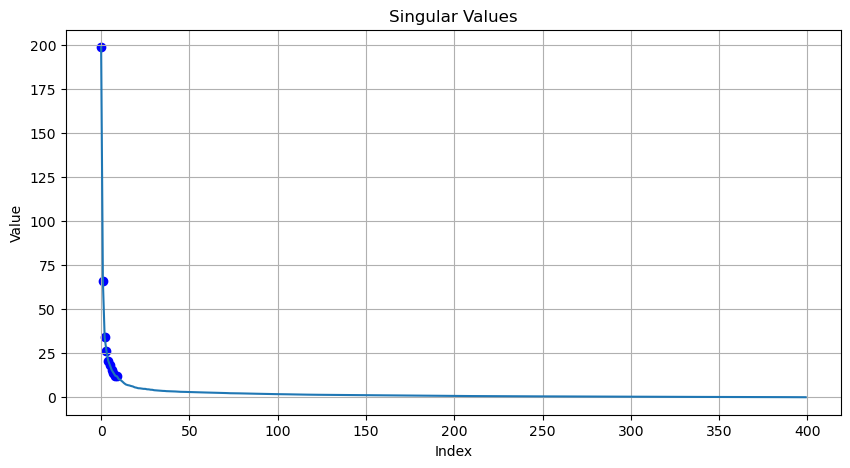

In [255]:
plt.figure(figsize=(10, 5))
plt.plot(S)
plt.scatter(range(0,10),S[0:10],  color='blue', marker='o')
plt.title("Singular Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid()
plt.show()

## Visualize k-Rank Approximations

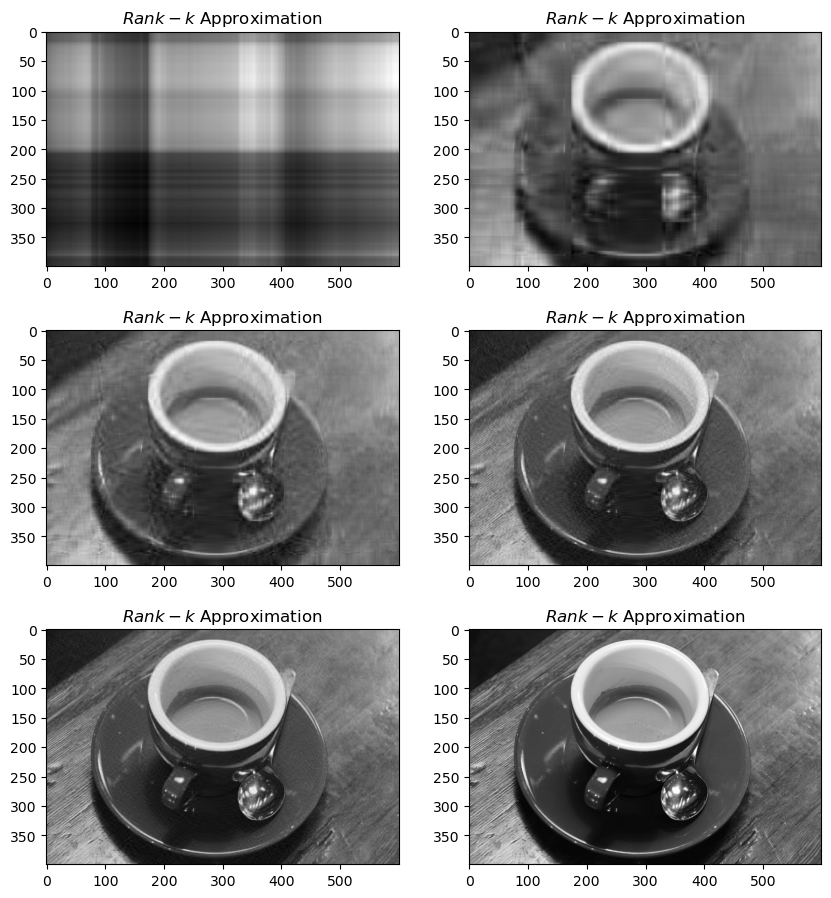

In [256]:
k_values = [1, 10, 25, 50, 100, 300]
plt.figure(figsize=(10, 11))
for i, k in enumerate(k_values):
    X_k = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    plt.subplot(3, 2, i + 1)
    plt.imshow(X_k, cmap="gray")
    plt.title(r"$Rank-{k}$ Approximation")
plt.show()

## Compute and Plot Approximation Error

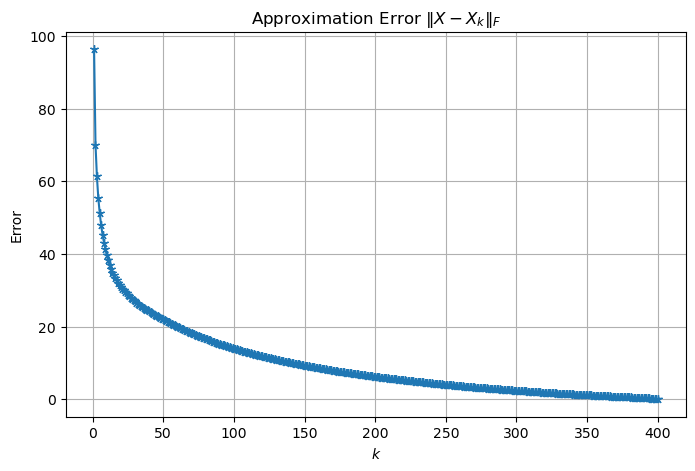

In [259]:
errors = []
for k in range(1, min(m, n) + 1):
    X_k = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    error = np.linalg.norm(image - X_k, ord="fro")
    errors.append(error)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(errors) + 1), errors,marker=(5, 2))
plt.title(r"Approximation Error $\|X - X_k\|_F$")
plt.xlabel(r"$k$")
plt.ylabel("Error")
plt.grid()
plt.show()

## Plot Compression Factor

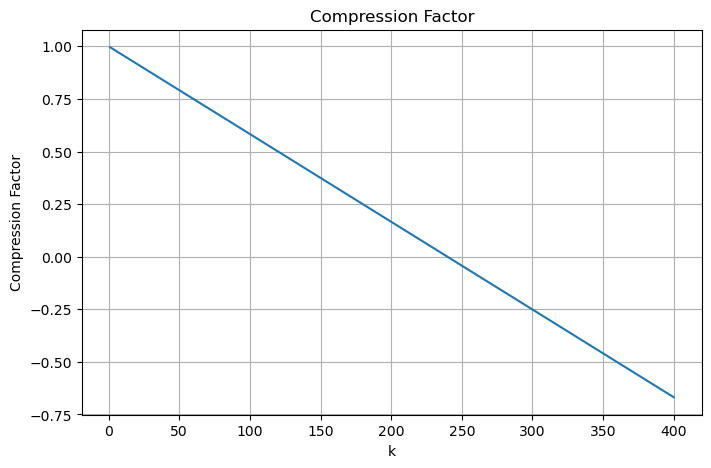

In [262]:
compression_factors = [1 - (k * (m + n + 1)) / (m * n) for k in range(1, min(m, n) + 1)]
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(compression_factors) + 1), compression_factors)
plt.title("Compression Factor")
plt.xlabel("k")
plt.ylabel("Compression Factor")
plt.grid()
plt.show()

## Find k where c_k = 0

In [263]:
k_c_x_testero = m * n // (m + n + 1)
error_at_c_x_testero = errors[k_c_x_testero - 1]

print(f"Compression factor c_k = 0 when k = {k_c_x_testero}")
print(f"Approximation error at c_k = 0: {error_at_c_zero:.4f}")

Compression factor c_k = 0 when k = 239
Approximation error at c_k = 0: 4.4009


Using a compressor factor k greater of 240 is worst of not compressing the image. Questo caso è raro e indicherebbe che la compressione ha aumentato la dimensione dei dati, il che non è desiderabile.  
the singular values  represent the amount of information contained in the corresponding singular vectors

# Classification of MNIST Digits with SVD Decomposition.

In [264]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load and preprocess the MNIST dataset

In [265]:
ds = pd.read_csv("train.csv")
# Inspect the data
print(f"Shape of the data: {ds.shape}")
print("")
# Convert data into a matrix
data = np.array(ds)

X = data[:, 1:]
X = X.T
Y = data[:, 0]

print(X.shape, Y.shape)
ds.head()

Shape of the data: (42000, 785)

(784, 42000) (42000,)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


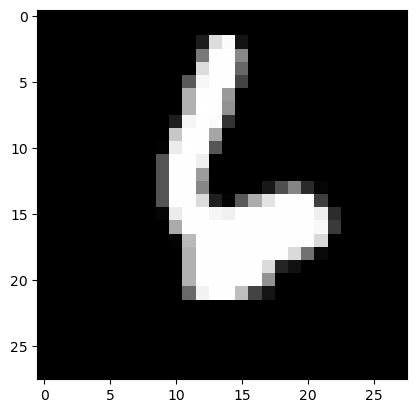

The associated digit is: 6


In [286]:
# Visualize the image of index 'idx' from the dataset 'X'

def visualize(X, idx):
    img = X[:, idx]
    img = np.reshape(img, (28, 28))# Reshape it
    plt.imshow(img, cmap='gray')
    plt.show()

# Visualize image
idx = 26
visualize(X, idx)
print(f"The associated digit is: {Y[idx]}")

In [328]:
# Function for filtering the dataset based on the label
def filter_dataset(X, Y, label):
    idx = np.zeros(Y.shape, dtype=bool)
    for i in range(len(label)):
        idx += Y == label[i]
    X_filtered = X[:, idx]
    Y_filtered = Y[idx]
    print(f"Shape of the original dataset: {X.shape} {Y.shape}")
    print(f"Shape of the filtered dataset: {X_filtered.shape} {Y_filtered.shape}")
    return X_filtered, Y_filtered

# split the data into training and testing sets
def split_data(X, Y, per_train=0.8):
    N_train = int(X.shape[1] * per_train)

    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    X_train = X[:, train_idx]
    Y_train = Y[train_idx]
    
    X_test = X[:, test_idx]
    Y_test = Y[test_idx]

    print(f"Train test split = {Y_train.size}, {Y_test.size}")

    return (X_train, Y_train), (X_test, Y_test)

def split_in_classes(X, Y, labels):
    classes = []
    for label in labels:
        classes.append(X[:, Y == label])
    print(f"Number of classes: {len(classes)}")
    return classes

In [329]:
# Project a vector x_test onto the subspace spanned by the columns of U
def project_onto_U(U, x_test):
    return U @ (U.T @ x_test)

# Classify a digit x_test as C1 or C2 based on the distances from the subspaces U1 and U2
def classify_digit(list_of_U, x_test, see = False):
    distances = []
    for i, U in enumerate(list_of_U):
        # Project x_test onto U
        x_proj = project_onto_U(U, x_test)
        # Distans x_test - x_proj
        d = np.linalg.norm(x_test - x_proj, 2)
        distances.append(d)
        if see:
            print(f"Distanza da U{i + 1}: {d}")
    
    # Return the index of the subspace with the smallest distance
    return np.argmin(distances) + 1

# Define the tax rate of misclassification of the test set
def misclassification_rate(list_of_U, labels, X_test, Y_test):
    N_test = X_test.shape[1]
    misclassifications = 0
    
    for i in range(N_test):
        z = X_test[:, i]
        true_label = Y_test[i]
        predicted_label = labels[classify_digit(list_of_U, z)-1]
        
        if predicted_label != true_label:
            misclassifications += 1
    
    MR = misclassifications / N_test
    return MR


In [ ]:
# Extract digits 3 and 4
labels = [3, 4]
X_3_4, Y_3_4 = filter_dataset(X, Y, labels)
d, N = X_3_4.shape
print(f"Number of samples: {N}")

# Train Test split
(X_3_4_train, Y_3_4_train), (X_3_4_test, Y_3_4_test) = split_data(X_3_4, Y_3_4, 0.80)

# Split the data into classes
classes = split_in_classes(X_3_4_train, Y_3_4_train, labels)
X1, X2 = classes
print(X1[1].shape + X2[1].shape)

# Decomposition SVD
U1, S1, Vt1 = np.linalg.svd(X1, full_matrices=False)
U2, S2, Vt2 = np.linalg.svd(X2, full_matrices=False)
print(f"Dimension of U1: {U1.shape}")
print(f"Dimension of U2: {U2.shape}")
list_of_U = [U1, U2]



Shape of the original dataset: (784, 42000) (42000,)
Shape of the filtered dataset: (784, 8423) (8423,)
Number of samples: 8423
Train test split = 6738, 1685
Number of classes: 2
(3465, 3273)
Dimension of U1: (784, 784)
Dimension of U2: (784, 784)


Distanza da U1: 4.932504872571743e-12
Distanza da U2: 6.584786641720263e-12
La cifra è classificata come: 3


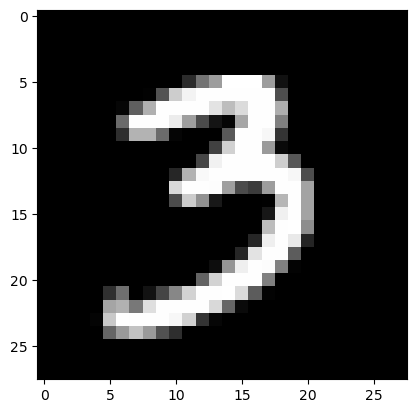

Distanza da U1: 5.1157269655014385e-12
Distanza da U2: 5.497601312969566e-12
La cifra è classificata come: 3


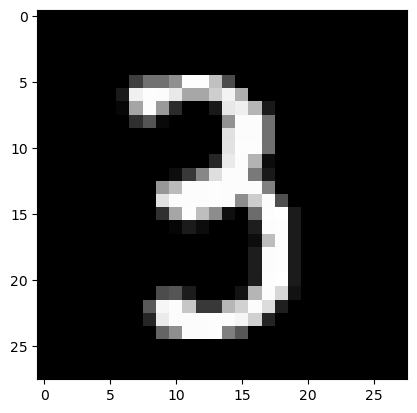

Distanza da U1: 5.3610689409664596e-12
Distanza da U2: 4.5626436273930506e-12
La cifra è classificata come: 4


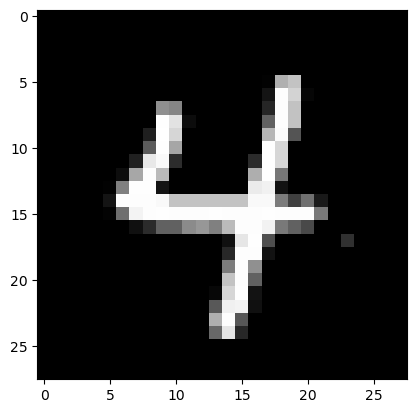

Distanza da U1: 5.32088833849753e-12
Distanza da U2: 4.0424595912021566e-12
La cifra è classificata come: 4


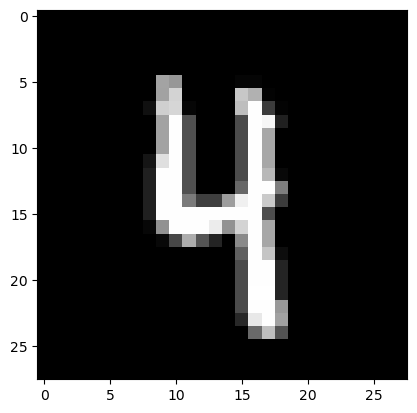

Distanza da U1: 5.049562576379007e-12
Distanza da U2: 4.946870163953555e-12
La cifra è classificata come: 4


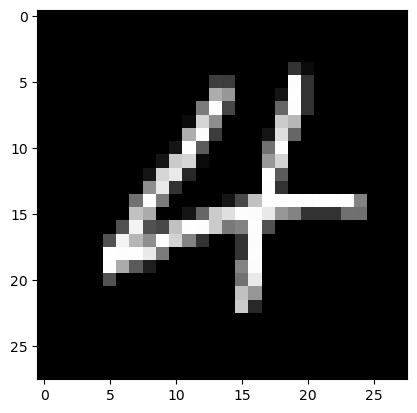

Distanza da U1: 6.664347773480589e-12
Distanza da U2: 5.317876241336407e-12
La cifra è classificata come: 4


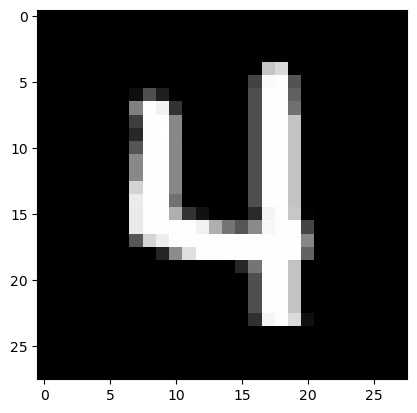

Distanza da U1: 6.770750783301856e-12
Distanza da U2: 5.9169799083595935e-12
La cifra è classificata come: 4


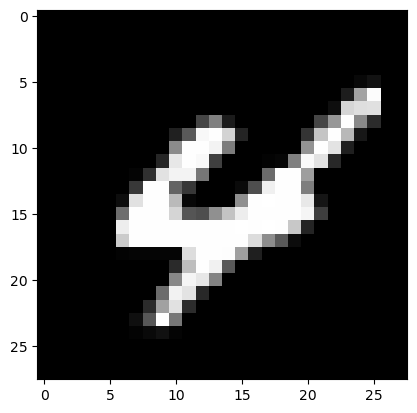

Distanza da U1: 5.775740600379115e-12
Distanza da U2: 6.406901690883351e-12
La cifra è classificata come: 3


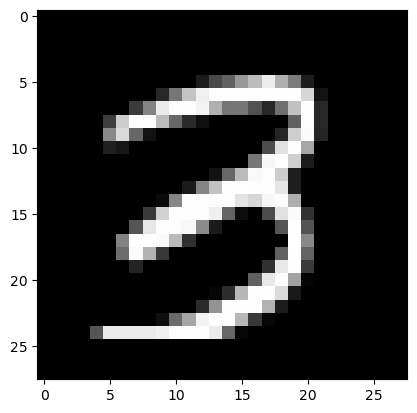

Distanza da U1: 6.000342717840377e-12
Distanza da U2: 6.081357265109674e-12
La cifra è classificata come: 3


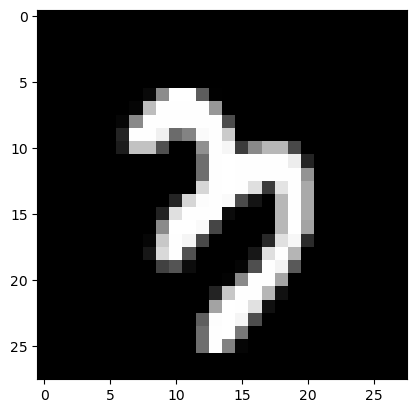

Distanza da U1: 5.311180968302239e-12
Distanza da U2: 7.553535910121403e-12
La cifra è classificata come: 3


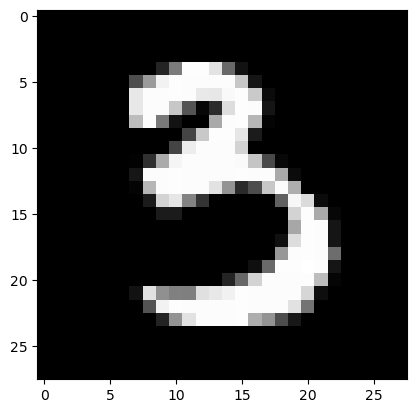

Distanza da U1: 4.7730784704121276e-12
Distanza da U2: 6.997513723007792e-12
La cifra è classificata come: 3


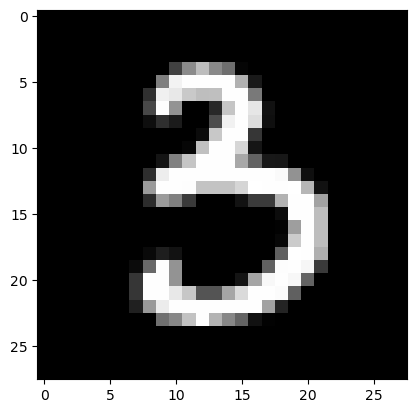

In [331]:
for i in range(0, 1001, 100):
    z = X_3_4_test[:, i]
    classe = classify_digit(list_of_U, z, see=True)
    print(f"La cifra è classificata come: {labels[classe-1]}")
    visualize(X_3_4_test, i)

In [332]:
MR = misclassification_rate(list_of_U, labels, X_3_4_test, Y_3_4_test)
print(f"Misclassification rate: {MR:.4f}")

Misclassification rate: 0.0439


In [ ]:
# Extract digits
labels = [8, 9]
X_8_9, Y_8_9 = filter_dataset(X, Y, labels)
d, N = X_8_9.shape
print(f"Number of samples: {N}")

# Train Test split
(X_8_9_train, Y_8_9_train), (X_8_9_test, Y_8_9_test) = split_data(X_8_9, Y_8_9, 0.80)

# Split the data into classes
classes = split_in_classes(X_8_9_train, Y_8_9_train, labels)
X1, X2 = classes
print(X1[1].shape + X2[1].shape)

# Decomposition SVD
U1, S1, Vt1 = np.linalg.svd(X1, full_matrices=False)
U2, S2, Vt2 = np.linalg.svd(X2, full_matrices=False)
print(f"Dimension of U1: {U1.shape}")
print(f"Dimension of U2: {U2.shape}")
list_of_U = [U1, U2]

MR = misclassification_rate(list_of_U, labels, X_8_9_test, Y_8_9_test)
print(f"Misclassification rate: {MR:.4f}")

Shape of the original dataset: (784, 42000) (42000,)
Shape of the filtered dataset: (784, 8251) (8251,)
Number of samples: 8251
Train test split = 6600, 1651
Number of classes: 2
(3273, 3327)
Dimension of U1: (784, 784)
Dimension of U2: (784, 784)
Misclassification rate: 0.2120


In [ ]:
# Extract digits
labels = [0, 1]
X_0_1, Y_0_1 = filter_dataset(X, Y, labels)
d, N = X_0_1.shape
print(f"Number of samples: {N}")

# Train Test split
(X_0_1_train, Y_0_1_train), (X_0_1_test, Y_0_1_test) = split_data(X_0_1, Y_0_1, 0.80)

# Split the data into classes
classes = split_in_classes(X_0_1_train, Y_0_1_train, labels)
X1, X2 = classes
print(X1[1].shape + X2[1].shape)

# Decomposition SVD
U1, S1, Vt1 = np.linalg.svd(X1, full_matrices=False)
U2, S2, Vt2 = np.linalg.svd(X2, full_matrices=False)
print(f"Dimension of U1: {U1.shape}")
print(f"Dimension of U2: {U2.shape}")
list_of_U = [U1, U2]

MR = misclassification_rate(list_of_U, labels, X_0_1_test, Y_0_1_test)
print(f"Misclassification rate: {MR:.4f}")

Shape of the original dataset: (784, 42000) (42000,)
Shape of the filtered dataset: (784, 8816) (8816,)
Number of samples: 8816
Train test split = 7052, 1764
Number of classes: 2
(3315, 3737)
Dimension of U1: (784, 784)
Dimension of U2: (784, 784)
Misclassification rate: 0.0119


In [ ]:
# Extract digits
labels = [0, 8, 9]
X_0_8_9, Y_0_8_9 = filter_dataset(X, Y, labels)
d, N = X_0_8_9.shape
print(f"Number of samples: {N}")

# Train Test split
(X_0_8_9_train, Y_0_8_9_train), (X_0_8_9_test, Y_0_8_9_test) = split_data(X_0_8_9, Y_0_8_9, 0.80)

# Split the data into classes
classes = split_in_classes(X_0_8_9_train, Y_0_8_9_train, labels)
X1, X2, X3 = classes
print(X1[1].shape + X2[1].shape+ X3[1].shape)

# Decomposition SVD
U1, S1, Vt1 = np.linalg.svd(X1, full_matrices=False)
U2, S2, Vt2 = np.linalg.svd(X2, full_matrices=False)
U3, S3, Vt3 = np.linalg.svd(X3, full_matrices=False)
print(f"Dimension of U1: {U1.shape}")
print(f"Dimension of U2: {U2.shape}")
print(f"Dimension of U3: {U3.shape}")
list_of_U = [U1, U2, U3]

MR = misclassification_rate(list_of_U, labels, X_0_8_9_test, Y_0_8_9_test)
print(f"Misclassification rate: {MR:.4f}")

Shape of the original dataset: (784, 42000) (42000,)
Shape of the filtered dataset: (784, 12383) (12383,)
Number of samples: 12383
Train test split = 9906, 2477
Number of classes: 3
(3334, 3231, 3341)
Dimension of U1: (784, 784)
Dimension of U2: (784, 784)
Dimension of U3: (784, 784)
Misclassification rate: 0.2515


In [ ]:
# Extract digits
labels = [0, 1, 7]
X_0_1_7, Y_0_1_7 = filter_dataset(X, Y, labels)
d, N = X_0_1_7.shape
print(f"Number of samples: {N}")

# Train Test split
(X_0_1_7_train, Y_0_1_7_train), (X_0_1_7_test, Y_0_1_7_test) = split_data(X_0_1_7, Y_0_1_7, 0.80)

# Split the data into classes
classes = split_in_classes(X_0_1_7_train, Y_0_1_7_train, labels)
X1, X2, X3 = classes
print(X1[1].shape + X2[1].shape+ X3[1].shape)

# Decomposition SVD
U1, S1, Vt1 = np.linalg.svd(X1, full_matrices=False)
U2, S2, Vt2 = np.linalg.svd(X2, full_matrices=False)
U3, S3, Vt3 = np.linalg.svd(X3, full_matrices=False)
print(f"Dimension of U1: {U1.shape}")
print(f"Dimension of U2: {U2.shape}")
print(f"Dimension of U3: {U3.shape}")
list_of_U = [U1, U2, U3]

MR = misclassification_rate(list_of_U, labels, X_0_1_7_test, Y_0_1_7_test)
print(f"Misclassification rate: {MR:.4f}")

Shape of the original dataset: (784, 42000) (42000,)
Shape of the filtered dataset: (784, 13217) (13217,)
Number of samples: 13217
Train test split = 10573, 2644
Number of classes: 3
(3299, 3721, 3553)
Dimension of U1: (784, 784)
Dimension of U2: (784, 784)
Dimension of U3: (784, 784)
Misclassification rate: 0.0893


# Clustering with PCA

In [342]:
import random

In [363]:
def PCA(X_train, X, d, k=2):
    # Compute centroid
    cX = np.mean(X, axis=1)

    # Make it a column vector
    cX = np.reshape(cX, (d, 1))

    # Center the data
    Xc = X - cX

    # Compute SVD decomposition
    U, s, VT = np.linalg.svd(Xc, full_matrices=False)

    # Compute reduced SVD
    Uk = U[:, :k]

    # Define projection matrix
    P = Uk.T

    # Project X_train -> Z_train
    Z_train = P @ X_train
    return Z_train


# Visualize the clusters
def visualize_2D(Z, Y):
    ax = plt.scatter(Z[0, :], Z[1, :], c=Y)
    plt.legend(*ax.legend_elements(), title="Digit") # Add to the legend the list of digits
    plt.xlabel(r"$z_1$")
    plt.ylabel(r"$z_2$")
    plt.title("PCA projection of MNIST digits 0-9")
    plt.grid()
    plt.show()

## Create train and test

In [339]:
ds = pd.read_csv("train.csv")
# Inspect the data
print(f"Shape of the data: {ds.shape}")
print("")
# Convert data into a matrix
data = np.array(ds)

X = data[:, 1:]
X = X.T
Y = data[:, 0]

print(X.shape, Y.shape)
ds.head()

Shape of the data: (42000, 785)

(784, 42000) (42000,)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [351]:
# Extract digits
labels = [0, 6, 9]
X_0_6_9, Y_0_6_9 = filter_dataset(X, Y, labels)
d, N = X_0_6_9.shape
print(f"Number of samples: {N}")

# Train Test split
random_number = round(random.random(),2)
(X_0_6_9_train, Y_0_6_9_train), (X_0_6_9_test, Y_0_6_9_test) = split_data(X_0_6_9, Y_0_6_9,random_number )
print(f"Numero casuale tra 0 e 1: {random_number}")


Shape of the original dataset: (784, 42000) (42000,)
Shape of the filtered dataset: (784, 12457) (12457,)
Number of samples: 12457
Train test split = 9841, 2616
Numero casuale tra 0 e 1: 0.79


In [358]:
Z_0_6_9_train = PCA(X_0_6_9_train, X, d, 2)
Z_0_6_9_train.shape

(2, 9841)

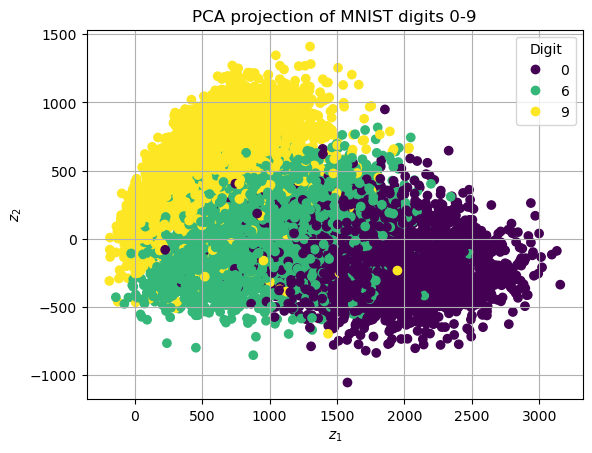

In [364]:
visualize_2D(Z_0_6_9_train, Y_0_6_9_train)

Calcolare la PCA di X_train: Utilizza l'algoritmo PCA per ridurre la dimensionalità di X_train a un valore fisso k.

Visualizzare i risultati: Visualizza i dati proiettati in due dimensioni (per k=2).

Identificare i cluster: Proietta X_train nella sua versione a bassa dimensione Z_train utilizzando la PCA e poi suddividi Z_train in insiemi (ad esempio, Z1, Z2, Z3) in base alla cifra rappresentata prima della proiezione PCA.

Calcolare e visualizzare i centroidi: Calcola il centroide di ciascun cluster e visualizza la posizione dei centroidi.